In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import random
import scipy.stats as stats

In [2]:
s=np.array(range(100,0,-1))
random.shuffle(s)
print('随机初始状态',np.array(s))

随机初始状态 [ 27  61  35  56  11  94  68  65  73  98  49  59   5   1  46  43  45  85
  44  16  40  84  33  92  47  31  39  83  79   7  13  95  28   2  24  57
  15  91  22  81  89  29  41  50  86  52 100  75  80  32  58   6  34  21
   4  55  10  66  17  30  62  97  54  26  63   3  67  76  87  88  51  18
   8  90  23  20  14  93  71  37  70  42  74  36  53  69  48  99  38  77
  96  60  19  25  82  12  64  78   9  72]


In [3]:
process=np.random.uniform(20,100,(1,100))
print('每个工件加工时间',process)

每个工件加工时间 [[57.83121328 73.32077917 42.11829532 47.63615057 28.81984749 36.20003718
  50.50548718 24.48090122 99.09229837 20.2622047  48.75130253 88.97779562
  66.86258385 39.58783966 77.69124406 42.37501218 25.1537114  33.84267083
  54.39672179 54.87493455 56.50896467 23.31967477 65.07013066 79.16686983
  48.65439589 22.25307957 26.36687067 23.15992506 99.90679921 96.25930058
  87.77276291 49.60544144 22.18914175 56.3618215  62.40571302 57.621934
  29.91825662 90.32273172 45.71458366 72.20301138 50.6846423  45.68109648
  66.44332866 26.1438799  88.96349425 76.7321921  51.51053845 98.67600841
  83.8655722  48.61955474 70.93005319 89.91835474 29.3654806  38.35574976
  96.83815975 78.21543336 41.43384387 22.52712221 49.40369505 82.58656363
  80.63759473 24.83719103 37.4442801  64.14923805 21.89370953 23.07828807
  37.07230975 58.21551617 27.77461815 46.63208603 90.27071922 59.90597819
  25.89137625 20.08908106 66.28866114 53.51373799 51.04329958 78.00335897
  98.73986907 26.09173302 92.71

In [4]:
class Chart:#画图类
    def __init__(self):
        self.fig, self.ax = plt.subplots(1, 1)
    
    def plot(self, episode_rewards, x, y):
        self.ax.clear()
        self.ax.plot(episode_rewards)
        self.ax.set_xlabel(x)
        self.ax.set_ylabel(y)
        self.fig.canvas.draw()

In [5]:
class SA:
    def __init__(self,T,Ta,Tmin,L,s0):#T温度 Ta温度下降比率 Tmin终止温度 L内循环最大次数 s0初始点
        self.T=T
        self.Ta=Ta
        self.Tmin=Tmin
        self.L=L
        self.s0=s0
        self.chart=Chart()
            
    def compute(self,s):#计算回报
        return float(np.dot(s,process.T))
    
    def opt2(self,s):#随机邻域搜索
        i=int(random.random()*100)
        while True:
            j=int(random.random()*100)
            if i!=j:
                break
        s1=s.copy()
        s1[i],s1[j]=s1[j],s1[i]
        return s1
    
    def train(self,Ev,chart=False):#Ev 期望最优值,表示已经到达预期目标,当状态的值低于这个值时不再进行循环 chart 是否绘图
        t=self.T
        s=self.s0.copy()
        m=self.compute(s)#m记录一次内循环的最优值
        m1=m#m1记录全局最优值
        reward=[]
        while t>self.Tmin and self.compute(s)>=Ev:
            for _ in range(self.L):
                s1=self.opt2(s)
                v1=self.compute(s1)
                v=self.compute(s)
                delta_v=v1-v
                p=math.exp(-delta_v/t)
                if delta_v<0:
                    m1=v1
                    s=s1
                elif np.random.choice(2,p=np.array([p,1-p]))==0:
                    s=s1
            if m1<m:
                m=m1
            if chart:
                reward.append(m)
                self.chart.plot(reward,'iteration','episode reward')
            t=t*self.Ta
            
        return s,m1

得到的最小值: 208680.54739359493 实际最小值: 208635.20858633728


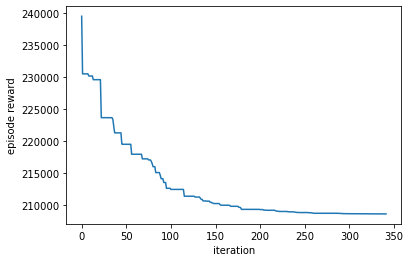

In [6]:
agent=SA(1000,0.98,1,300,s)
state,minn=agent.train(0,True)

target=np.sort(process.copy())
sequence=np.array(range(100,0,-1))
print('得到的最小值:',minn,'实际最小值:',float(np.dot(sequence,target.T)))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1652\3045456413.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig, self.ax = plt.subplots(1, 1)


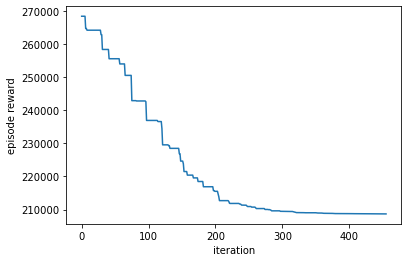

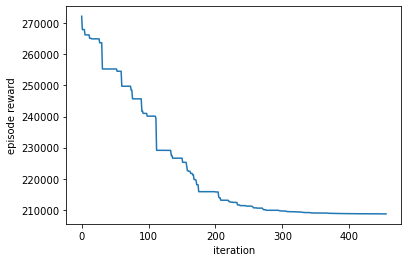

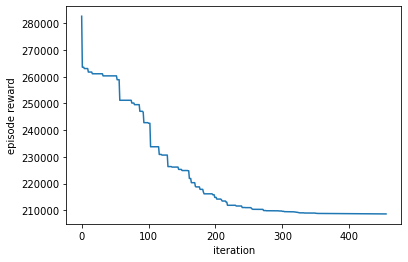

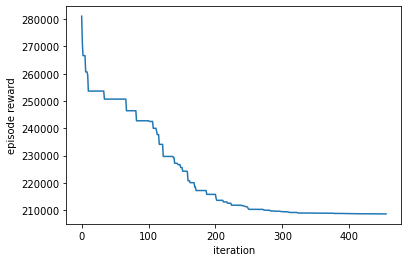

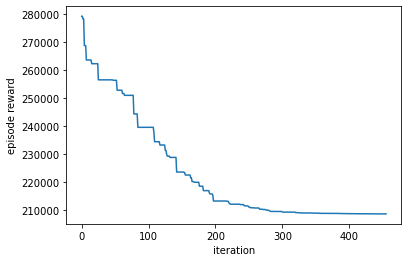

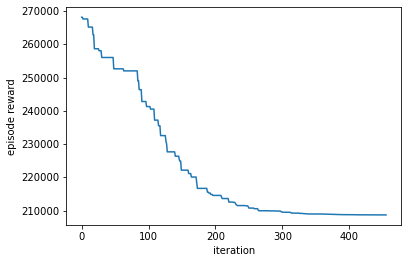

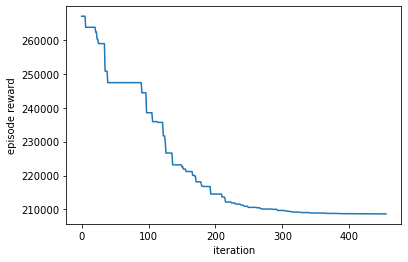

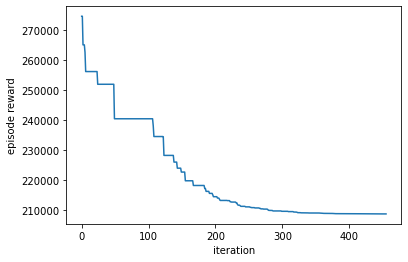

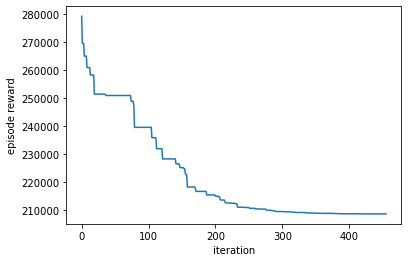

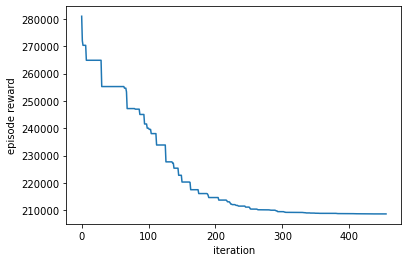

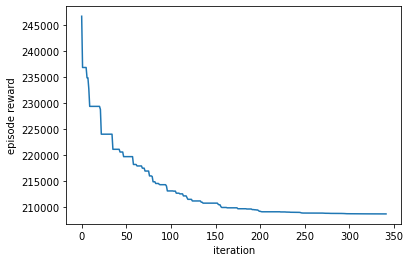

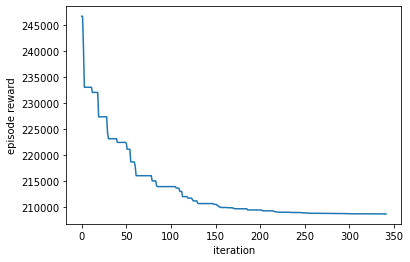

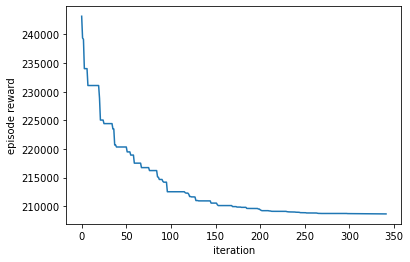

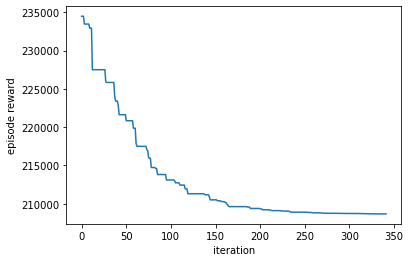

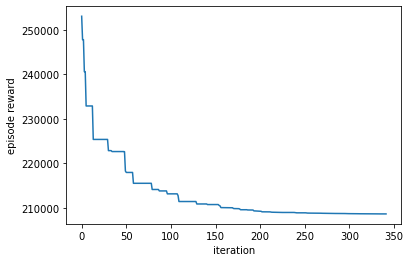

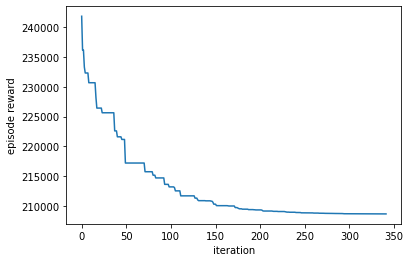

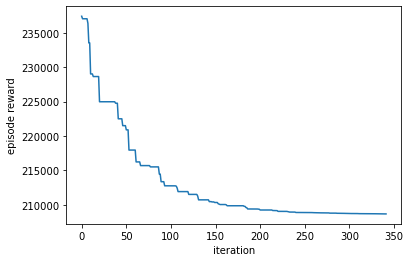

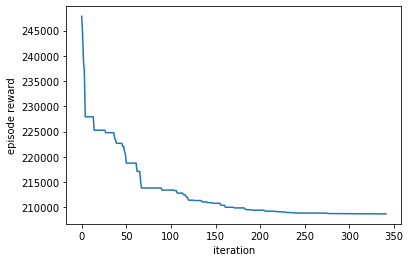

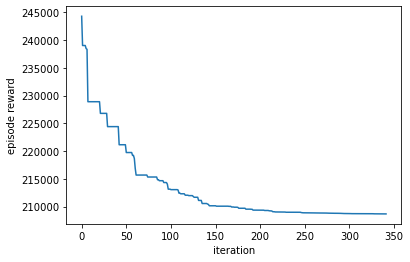

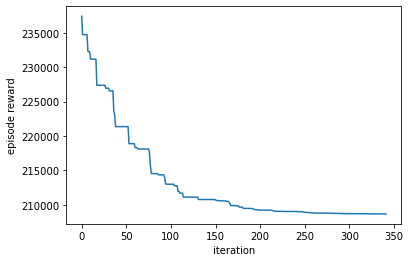

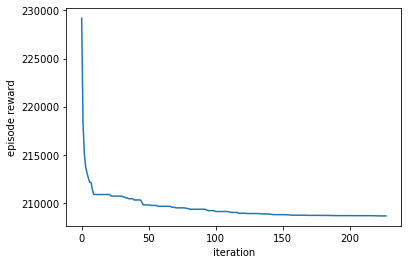

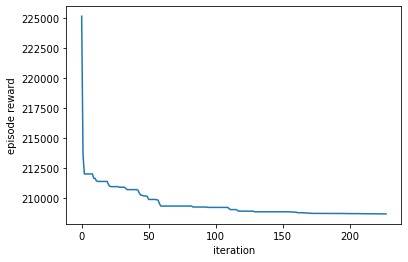

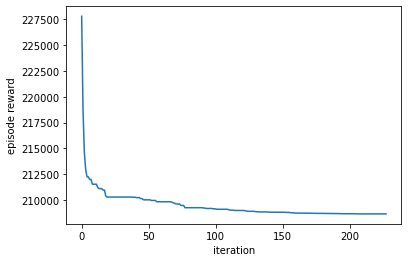

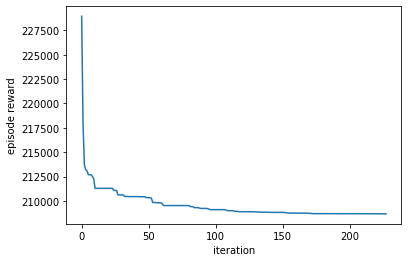

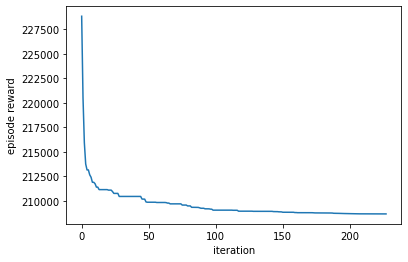

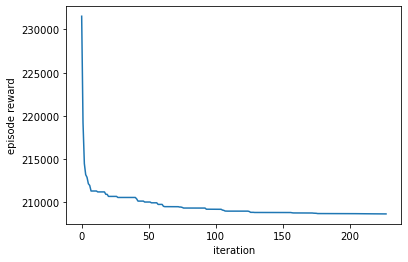

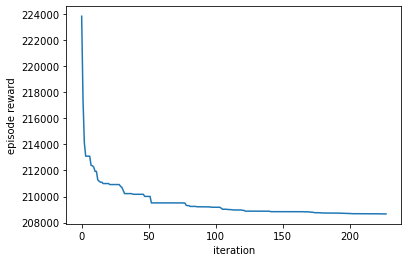

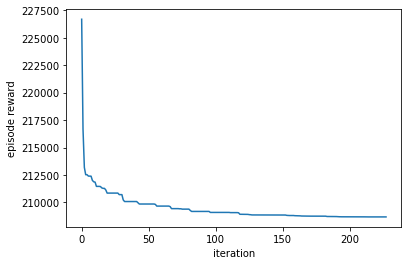

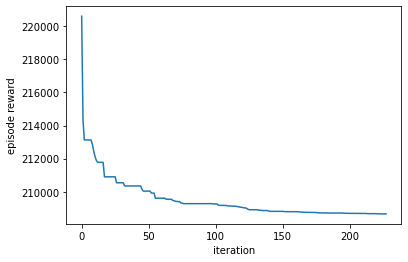

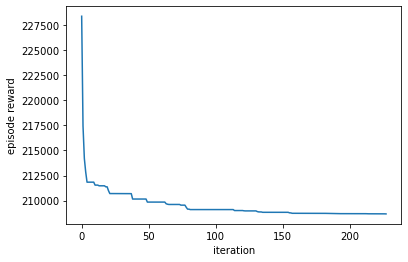

In [7]:
data10000=[]
for i in range(10):
    agent=SA(10000,0.98,1,300,s)
    state,minn=agent.train(0,True)
    data10000.append(minn)
data1000=[]
for i in range(10):
    agent=SA(1000,0.98,1,300,s)
    state,minn=agent.train(0,True)
    data1000.append(minn)
data100=[]
for i in range(10):
    agent=SA(100,0.98,1,300,s)
    state,minn=agent.train(0,True)
    data100.append(minn)

In [8]:
a=stats.ttest_rel(data10000,data1000)
b=stats.ttest_rel(data10000,data100)
c=stats.ttest_rel(data1000,data100)
print(a)
print(b)
print(c)

Ttest_relResult(statistic=1.6192993119328216, pvalue=0.13983547360182366)
Ttest_relResult(statistic=0.4263579299174816, pvalue=0.67986332454816)
Ttest_relResult(statistic=-1.6875854244157005, pvalue=0.1257630737835269)
